In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomTreesEmbedding, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score


In [18]:
star = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP_2_Voting_Class/Stars.csv')

In [19]:
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [20]:
star.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

# We have to create dummy variables for our object data types

In [21]:
star = pd.get_dummies(star,['Color','Spectral_Class'])
star

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
X = star.drop(['Type'],axis=1)
y = star['Type']

# After checking the value counts for our Y variable, we can see that we have even distribution of of types of stars

In [23]:
star.Type.value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [24]:
scaler = StandardScaler()


X = scaler.fit_transform(X)

In [25]:
X_train, X_test,y_train,y_test = train_test_split(X,y, 
                                                  test_size =.20,
                                                  random_state=0 
                                                  )

In [26]:
log_clf = LogisticRegression(solver='lbfgs',
                             multi_class='multinomial', 
                             max_iter = 10000)

rnd_clf = RandomForestClassifier(criterion='entropy',
                                 max_features='sqrt')


svm_clf= SVC(gamma='auto',probability = True, C=10,kernel = 'rbf')

dt_clf = DecisionTreeClassifier(criterion='gini',
                                splitter='best')

# With Soft voting, we get a 100% score for both our train splits and test splits

In [27]:
voting_clf_soft = VotingClassifier( 
    estimators=[('lr',log_clf),
                ('rf',rnd_clf),
                ('sv',svm_clf),
                ('dt',dt_clf)],  
                voting = 'soft',
                verbose=3)
voting_clf_soft.fit(X_train,y_train)
#
#
#
print("The score for the Voting Classifier with soft voting and using our test splits: ", voting_clf_soft.score(X_test,y_test))
print("The score for the Voting Classifier with soft voting and using our train splits: ",voting_clf_soft.score(X_train,y_train))

[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ....................... (2 of 4) Processing rf, total=   0.2s
[Voting] ....................... (3 of 4) Processing sv, total=   0.0s
[Voting] ....................... (4 of 4) Processing dt, total=   0.0s
The score for the Voting Classifier with soft voting and using our test splits:  1.0
The score for the Voting Classifier with soft voting and using our train splits:  1.0


In [28]:

print("The score for the Voting Classifier with soft voting and using our test splits: ", voting_clf_soft.score(X_test,y_test))
print("The score for the Voting Classifier with soft voting and using our train splits: ",voting_clf_soft.score(X_train,y_train))

The score for the Voting Classifier with soft voting and using our test splits:  1.0
The score for the Voting Classifier with soft voting and using our train splits:  1.0


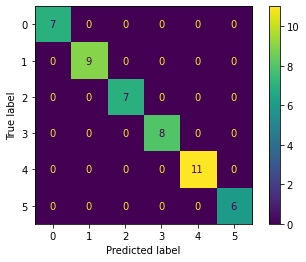

In [29]:
y_pred_vote = voting_clf_soft.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=voting_clf_soft.classes_)
disp.plot()

plt.show()

# Now lets see how our scores change with Hard voting

In [30]:
voting_clf_hard = VotingClassifier( 
    estimators=[('lr',log_clf),
                ('rf',rnd_clf),
                ('sv',svm_clf),
                ('dt',dt_clf)],  
                voting = 'hard',
                verbose=3)
voting_clf_hard.fit(X_train,y_train)
#
#
#
print("The score for the Voting Classifier with soft voting and using our test splits: ", voting_clf_hard.score(X_test,y_test))
print("The score for the Voting Classifier with soft voting and using our train splits: ",voting_clf_hard.score(X_train,y_train))

[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ....................... (2 of 4) Processing rf, total=   0.2s
[Voting] ....................... (3 of 4) Processing sv, total=   0.0s
[Voting] ....................... (4 of 4) Processing dt, total=   0.0s
The score for the Voting Classifier with soft voting and using our test splits:  0.9791666666666666
The score for the Voting Classifier with soft voting and using our train splits:  0.984375


# We have slightly lower scores when we use hard voting versus when we use soft voting

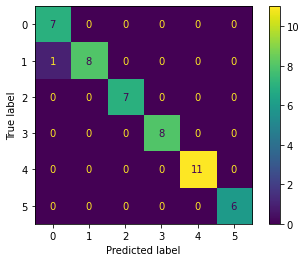

In [31]:
y_pred_vote = voting_clf_hard.predict(X_test)
cmd = confusion_matrix(y_test,y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cmd, 
                              display_labels=voting_clf_hard.classes_)
disp.plot()

plt.show()

# Soft Voting was the best option for this data